In [ ]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.algorithms import GroundStateEigensolver
from qiskit_algorithms import NumPyMinimumEigensolver
import matplotlib.pyplot as plt

In [2]:
geometry="H 0.0 0.0 0.0; H 0.0 0.0 0.74"

In [3]:
driver=PySCFDriver(
    atom=geometry,
    basis="sto-3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)

In [4]:
problem=driver.run()

In [5]:
problem.num_particles

(1, 1)

In [6]:
problem.num_spatial_orbitals

2

## Hartree-Fock-Rechnung

In [13]:
hf_energy=problem.reference_energy
nuclear_repulsion=problem.nuclear_repulsion_energy

In [14]:
print(f"Hartree-Fock-Energie: {hf_energy}")
print(f"Kern-Kern-Abstoßung: {nuclear_repulsion}")

Hartree-Fock-Energie: -1.1167593073964255
Kern-Kern-Abstoßung: 0.7151043390810812


## full configuration interaction

In [9]:
mapper=JordanWignerMapper()
solver=NumPyMinimumEigensolver()
gse=GroundStateEigensolver(mapper, solver)
result=gse.solve(problem=problem)

In [11]:
fci_energy=result.total_energies[0]
corr_energy=fci_energy-hf_energy

In [12]:
print(f"exakte Referenzenergie mit Full CI: {fci_energy}")
print(f"Korrelationsenergie: {corr_energy}")

exakte Referenzenergie mit Full CI: -1.137283834488501
Korrelationsenergie: -0.02052452709207553


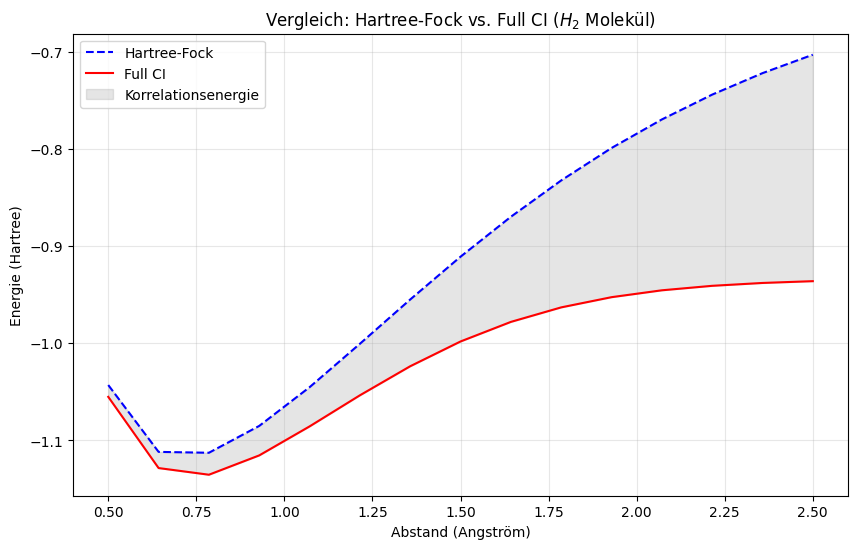

In [17]:

distances = np.linspace(0.5, 2.5, 15)
hf_energies = []
fci_energies = []


for dist in distances:
    driver = PySCFDriver(atom=f"H 0 0 0; H 0 0 {dist}", basis="sto3g")
    problem = driver.run()
    hf_energies.append(problem.reference_energy)
    result = gse.solve(problem)
    fci_energies.append(result.total_energies[0])

plt.figure(figsize=(10, 6))
plt.plot(distances, hf_energies, 'b--', label='Hartree-Fock')
plt.plot(distances, fci_energies, 'r-', label='Full CI')

plt.fill_between(distances, hf_energies, fci_energies, color='gray', alpha=0.2, label='Korrelationsenergie')

plt.title('Vergleich: Hartree-Fock vs. Full CI ($H_2$ Molekül)')
plt.xlabel('Abstand (Angström)')
plt.ylabel('Energie (Hartree)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()